# MTG Analysis: Cleaning the data to be used

In [807]:
# import analytics tool
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [808]:
# import ML tools
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


In [809]:
# import card data
cards_df = pd.read_csv('data_files/cards.csv')
cards_df.head(5)


/var/folders/tm/jmhp8xvj4_d4hh_01cf1jt_r0000gn/T/ipykernel_97025/3623479123.py:2: DtypeWarning: Columns (3,7,12,16,20,23,25,26,30,31,32,33,35,39,40,41,47,52,53,61,62,66,68) have mixed types. Specify dtype option on import or set low_memory=False.
  cards_df = pd.read_csv('data_files/cards.csv')


,artist,artistIds,asciiName,attractionLights,availability,boosterTypes,borderColor,cardParts,colorIdentity,colorIndicator,...,subsets,subtypes,supertypes,text,toughness,type,types,uuid,variations,watermark
0,Pete Venters,d54c4a1a-c0c5-4834-84db-125d341f3ad8,NaN,NaN,"mtgo, paper",default,black,NaN,W,NaN,...,NaN,"Human, Cleric",NaN,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,b7c19924-b4bf-56fc-aa73-f586e940bd42,NaN
1,Pete Venters,d54c4a1a-c0c5-4834-84db-125d341f3ad8,NaN,NaN,"mtgo, paper",default,black,NaN,W,NaN,...,NaN,"Human, Cleric",NaN,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature,b7c19924-b4bf-56fc-aa73-f586e940bd42,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,NaN
2,Volkan Baǵa,93bec3c0-0260-4d31-8064-5d01efb4153f,NaN,NaN,"mtgo, paper",default,black,NaN,W,NaN,...,NaN,Angel,NaN,Flying\nWhen Angel of Mercy enters the battlef...,3,Creature — Angel,Creature,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a,NaN
3,Volkan Baǵa,93bec3c0-0260-4d31-8064-5d01efb4153f,NaN,NaN,"mtgo, paper",default,black,NaN,W,NaN,...,NaN,Angel,NaN,Flying\nWhen Angel of Mercy enters the battlef...,3,Creature — Angel,Creature,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c,NaN
4,Mark Zug,48e2b98c-5467-4671-bd42-4c3746115117,NaN,NaN,"mtgo, paper",default,black,NaN,W,NaN,...,NaN,NaN,NaN,Target creature gets +3/+3 and gains flying un...,NaN,Sorcery,Sorcery,55bd38ca-dc73-5c06-8f80-a6ddd2f44382,c5655330-5131-5f40-9d3e-0549d88c6e9e,NaN


In [810]:
# list all columns
cards_df.columns.to_list()[0:5]


['artist', 'artistIds', 'asciiName', 'attractionLights', 'availability']

In [811]:
# Trim down the columns
cards_df = cards_df[['name', 'types', 'colors','power',
          'toughness', 'manaCost','manaValue', 'rarity',  'setCode', 'uuid']]


In [812]:
# import price data
price_df = pd.read_csv('data_files/cardPrices.csv')
price_df.head(5)


,cardFinish,currency,date,gameAvailability,price,priceProvider,providerListing,uuid
0,normal,USD,2023-10-22,mtgo,0.07,cardhoarder,retail,f182e364-0439-5594-a6e6-75f7889ccf45
1,normal,USD,2023-10-22,mtgo,0.23,cardhoarder,retail,330deaa3-dd7a-52a8-bfbc-b323cd16a409
2,normal,USD,2023-10-22,mtgo,0.02,cardhoarder,retail,79e36956-b91f-580f-8309-7d9585a67560
3,normal,USD,2023-10-22,mtgo,0.15,cardhoarder,retail,6afb2b4c-530a-57d5-8e7f-871239f6fa05
4,normal,USD,2023-10-22,mtgo,0.02,cardhoarder,retail,b1fc2762-92aa-5a14-8509-a59cb611e376


In [813]:
price_df.columns.to_list()


['cardFinish',
 'currency',
 'date',
 'gameAvailability',
 'price',
 'priceProvider',
 'providerListing',
 'uuid']

In [917]:
# Import set data
set_df = pd.read_csv('data_files/sets.csv')
set_df.head(5)


,baseSetSize,block,cardsphereSetId,code,isFoilOnly,isForeignOnly,isNonFoilOnly,isOnlineOnly,isPartialPreview,keyruneCode,...,mcmIdExtras,mcmName,mtgoCode,name,parentCode,releaseDate,tcgplayerGroupId,tokenSetCode,totalSetSize,type
0,383,Core Set,755.0,10E,False,NaN,NaN,False,NaN,10E,...,NaN,Tenth Edition,10E,Tenth Edition,NaN,2007-07-13,1.0,T10E,510,core
1,302,Core Set,938.0,2ED,False,NaN,True,False,NaN,2ED,...,NaN,NaN,NaN,Unlimited Edition,NaN,1993-12-01,115.0,NaN,302,core
2,577,NaN,1462.0,2X2,False,NaN,NaN,False,NaN,2X2,...,5071.0,Double Masters 2022,NaN,Double Masters 2022,NaN,2022-07-08,3070.0,T2X2,579,masters
3,332,NaN,1251.0,2XM,False,NaN,NaN,False,NaN,2XM,...,3209.0,Double Masters,2XM,Double Masters,NaN,2020-08-07,2655.0,T2XM,384,masters
4,594,NaN,NaN,30A,False,NaN,True,False,NaN,30A,...,NaN,30th Anniversary Edition,NaN,30th Anniversary Edition,NaN,2022-11-28,3178.0,T30A,594,memorabilia


In [918]:
# List all columns
set_df.columns.to_list()


['baseSetSize',
 'block',
 'cardsphereSetId',
 'code',
 'isFoilOnly',
 'isForeignOnly',
 'isNonFoilOnly',
 'isOnlineOnly',
 'isPartialPreview',
 'keyruneCode',
 'languages',
 'mcmId',
 'mcmIdExtras',
 'mcmName',
 'mtgoCode',
 'name',
 'parentCode',
 'releaseDate',
 'tcgplayerGroupId',
 'tokenSetCode',
 'totalSetSize',
 'type']

In [920]:
standard_legal = ['MID','VOW','NEO','SNC', 'DMU', 'BRO','MOM','MAT','WOE']
set_df =set_df[set_df['code'].isin(standard_legal)]
set_df['baseSetSize'].sum()


2327

## Cleaning the Cards data frame

#### Filtering the sets that are standard legal

In [817]:
# List set codes to find the standard legal cards I want to analyze
cards_df['setCode'].unique().tolist()[0:5]


['10E', '2ED', '2X2', '2XM', '30A']

In [818]:
# Dataframe that shows most of all standard legal cards
standard_legal = ['MID','VOW','NEO','SNC', 'DMU', 'BRO','MOM','MAT','WOE']
standard_cards_df = cards_df[cards_df['setCode'].isin(standard_legal)]
standard_cards_df.head(5)


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
12032,Aeronaut Cavalry,Creature,W,3,4,{4}{W},5.0,common,BRO,6ff98307-b89c-5a43-bc3c-3f81d803617d
12033,Airlift Chaplain,Creature,W,1,1,{2}{W},3.0,common,BRO,e4d66ec1-7ba2-5c80-a9c1-e33500cfdbb5
12034,Ambush Paratrooper,Creature,W,1,2,{1}{W},2.0,common,BRO,8d065ec5-4e7f-50f6-92c8-277673a6fb19
12035,Calamity's Wake,Instant,W,NaN,NaN,{1}{W},2.0,uncommon,BRO,45e16536-c429-54c9-906e-43b9f9ee83b2
12036,Deadly Riposte,Instant,W,NaN,NaN,{1}{W},2.0,common,BRO,d184bcd7-1c35-558f-8fd4-c2065a349018


In [819]:
# Cards in MID with duplicates dropped via names
mom_cards = standard_cards_df[standard_cards_df['setCode'] == 'MOM']
mom_cards = mom_cards.drop_duplicates(subset='name', keep='first')
mom_cards.head(5)


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
49088,Invasion of Ravnica // Guildpact Paragon,Battle,NaN,NaN,NaN,{5},5.0,mythic,MOM,dff87229-6257-5fe4-907e-694ad4f8974e
49090,Aerial Boost,Instant,W,NaN,NaN,{1}{W},2.0,common,MOM,eeacede0-193a-53ec-b9c6-ec616b960c2a
49091,Alabaster Host Intercessor,Creature,W,3,4,{5}{W},6.0,common,MOM,79bc98eb-7179-58d4-b472-4bbdc438ffa9
49092,Alabaster Host Sanctifier,Creature,W,2,2,{1}{W},2.0,common,MOM,b1334ce9-0115-51bc-bc46-c1303be41f84
49093,Angelic Intervention,Instant,W,NaN,NaN,{1}{W},2.0,common,MOM,3769fbfe-178d-5ac1-ac29-ba0f3d97bf60


In [820]:
# Using a for loop to drop all duplicates in all standard legal sets

# Legal Sets
standard_legal = ['MID', 'VOW', 'NEO', 'SNC', 'DMU', 'BRO', 'ONE', 'MOM', 'MAT', 'WOE']

# Empty Data Frame
standard_cards_df = pd.DataFrame()

#For lopp to ad all the data into empty data frame
for set_code in standard_legal:
    set_cards = cards_df[cards_df['setCode'] == set_code]
    set_cards_unique = set_cards.drop_duplicates(subset='name', keep='first')
    standard_cards_df = pd.concat([standard_cards_df, set_cards_unique], ignore_index=True)

standard_cards_df.head(5)


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
0,"Adeline, Resplendent Cathar",Creature,W,*,4,{1}{W}{W},3.0,rare,MID,f10c65cc-1a64-552e-b53c-f825ca89d5eb
1,Ambitious Farmhand // Seasoned Cathar,Creature,W,1,1,{1}{W},2.0,uncommon,MID,cf968d16-027f-5970-a3a3-cb2f49e8dca0
2,Beloved Beggar // Generous Soul,Creature,W,0,4,{1}{W},2.0,uncommon,MID,13d054c7-4c25-5425-8b39-01fed17ebca1
3,Bereaved Survivor // Dauntless Avenger,Creature,W,2,1,{2}{W},3.0,uncommon,MID,295b974a-b0ee-59f3-829e-6f9912c9c9b7
4,Blessed Defiance,Instant,W,NaN,NaN,{W},1.0,common,MID,87f85d5d-834c-589d-9738-1983bba0ded8


#### Testing the data frame by finding specific names and sets of cards

In [821]:
standard_cards_df[standard_cards_df['name'] == 'Etali, Primal Conqueror // Etali, Primal Sickness']


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
2136,"Etali, Primal Conqueror // Etali, Primal Sickness",Creature,R,7,7,{5}{R}{R},7.0,rare,MOM,1bc06916-8692-57f2-a049-5363d143baa6


In [822]:
# Check for cards that are not legal in standard. Aftermath has mutliverse legends which are not standard legal
mat_cards = standard_cards_df.loc[standard_cards_df['setCode'] == 'MAT', 'name'].unique()
mat_cards = pd.Series(mat_cards)
print(f'Number of unique card in MAT is {mat_cards.count()}.')


Number of unique card in MAT is 50.


#### Create a Banned list to be removed from the data set

In [823]:
# Remove all banned cards from
standard_ban_list = ['The Meathook Massacre',
'Fable of the Mirror-Breaker//Reflection of Kiki-Jiki',
'Invoke Despair',
'Reckoner Bankbuster']
banned_cards = standard_cards_df[standard_cards_df['name'].isin(standard_ban_list)]
banned_cards


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
117,The Meathook Massacre,Enchantment,B,NaN,NaN,{X}{B}{B},2.0,mythic,MID,c918b5d5-48c1-50b1-a924-3babf7992b57
671,Invoke Despair,Sorcery,B,NaN,NaN,{1}{B}{B}{B}{B},5.0,rare,NEO,c9f820b9-5b00-527f-8f9f-2bf9ad89a8bd
834,Reckoner Bankbuster,Artifact,NaN,4,4,{2},2.0,rare,NEO,55b5864a-8d81-55b5-bfd6-c927e0c380d7


This did not give me all the cards I wanted to ban Fable of the Mirror-Breaker//Reflection of Kiki-Jiki was missing from the list

In [824]:
# Find Fable of the Mirror-Breaker
fable_card = standard_cards_df[standard_cards_df['name'].str.contains('Fable')]
fable_card


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
714,Fable of the Mirror-Breaker // Reflection of K...,Enchantment,R,NaN,NaN,{2}{R},3.0,rare,NEO,e54871ca-b187-5a71-b8eb-9e9c5322f4a4


In [825]:
# Final df that shows all banned cards
banned_cards = pd.concat([banned_cards, fable_card], ignore_index=True).drop_duplicates()
banned_cards


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
0,The Meathook Massacre,Enchantment,B,NaN,NaN,{X}{B}{B},2.0,mythic,MID,c918b5d5-48c1-50b1-a924-3babf7992b57
1,Invoke Despair,Sorcery,B,NaN,NaN,{1}{B}{B}{B}{B},5.0,rare,NEO,c9f820b9-5b00-527f-8f9f-2bf9ad89a8bd
2,Reckoner Bankbuster,Artifact,NaN,4,4,{2},2.0,rare,NEO,55b5864a-8d81-55b5-bfd6-c927e0c380d7
3,Fable of the Mirror-Breaker // Reflection of K...,Enchantment,R,NaN,NaN,{2}{R},3.0,rare,NEO,e54871ca-b187-5a71-b8eb-9e9c5322f4a4


In [921]:
standard_legal_df = pd.concat([standard_cards_df, banned_cards]).drop_duplicates(keep=False)
standard_legal_df


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
0,"Adeline, Resplendent Cathar",Creature,W,*,4,{1}{W}{W},3.0,rare,MID,f10c65cc-1a64-552e-b53c-f825ca89d5eb
1,Ambitious Farmhand // Seasoned Cathar,Creature,W,1,1,{1}{W},2.0,uncommon,MID,cf968d16-027f-5970-a3a3-cb2f49e8dca0
2,Beloved Beggar // Generous Soul,Creature,W,0,4,{1}{W},2.0,uncommon,MID,13d054c7-4c25-5425-8b39-01fed17ebca1
3,Bereaved Survivor // Dauntless Avenger,Creature,W,2,1,{2}{W},3.0,uncommon,MID,295b974a-b0ee-59f3-829e-6f9912c9c9b7
4,Blessed Defiance,Instant,W,NaN,NaN,{W},1.0,common,MID,87f85d5d-834c-589d-9738-1983bba0ded8
...,...,...,...,...,...,...,...,...,...,...
2622,Charging Hooligan,Creature,R,3,3,{3}{R},4.0,uncommon,WOE,2d2dc7fe-461a-5624-905b-216b43f63644
2623,Ogre Chitterlord,Creature,R,6,5,{4}{R}{R},6.0,rare,WOE,e1a431ee-d95b-521b-9429-63885fab45a1
2624,Intrepid Trufflesnout // Go Hog Wild,Creature,G,3,1,{1}{G},2.0,uncommon,WOE,6141fd5d-4051-530e-850c-e35a82c990a1
2625,Provisions Merchant,Creature,G,3,3,{2}{G}{G},4.0,uncommon,WOE,f5c9b1a7-3c21-51e5-a15b-0278d9f748e5


#### Getting a feel for the data, and cleaning up the colors

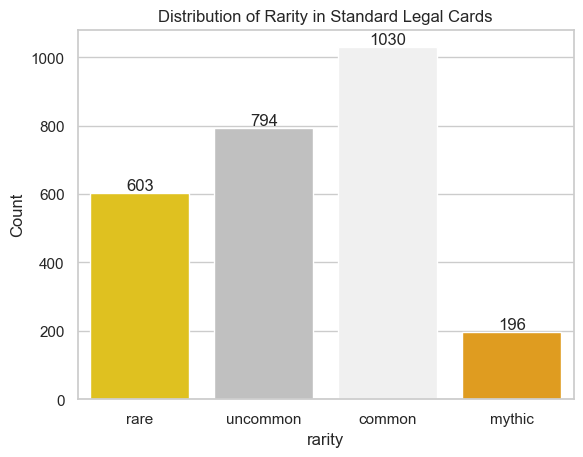

In [827]:
# Count of each rarity
custom_palette = {
    'common': '#F0F0F0',
    'uncommon': 'silver',
    'mythic': 'orange',
    'rare': 'gold'
}

ax = sns.countplot(x='rarity', palette=custom_palette, data=standard_legal_df)
ax.bar_label(ax.containers[0])
plt.ylabel('Count')
plt.title('Distribution of Rarity in Standard Legal Cards')
plt.show()


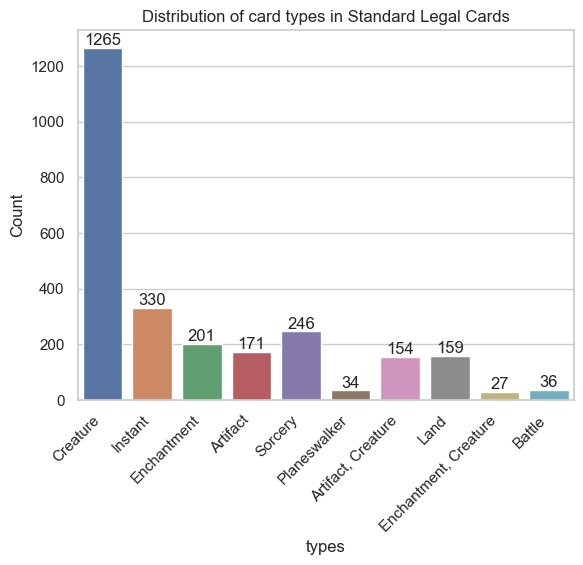

In [828]:
# Count of card types
ax = sns.countplot(x='types', data=standard_legal_df)
ax.bar_label(ax.containers[0])
plt.ylabel('Count')
plt.title('Distribution of card types in Standard Legal Cards')
plt.xticks(rotation=45, ha='right')
plt.show()


In [829]:
# Distirbution of Colors, nan color?
standard_legal_df['colors'].unique()


array(['W', 'U', 'B', 'R', 'G', 'R, W', 'R, U', 'G, R', 'B, U', 'B, W',
       'G, U', 'G, W', 'U, W', 'B, G', 'B, R', nan, 'R, U, W', 'B, R, W',
       'B, G, R, U, W', 'G, R, W', 'G, U, W', 'B, R, U', 'B, G, R',
       'B, U, W', 'B, G, U, W', 'G, R, U', 'B, G, W', 'B, G, U',
       'U, R, G'], dtype=object)

In [830]:
# Nan color seems to be colorless cards and lands
null_color_df = standard_legal_df[standard_legal_df['colors'].isnull()]
null_color_df.head(5)


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
259,The Celestus,Artifact,NaN,NaN,NaN,{3},3.0,rare,MID,bc06cbe5-e4ff-54d9-b504-a5c7b3333124
260,Crossroads Candleguide,"Artifact, Creature",NaN,3,4,{4},4.0,common,MID,141d1f58-946a-5630-bdf1-9df88e80010e
261,Jack-o'-Lantern,Artifact,NaN,NaN,NaN,{1},1.0,common,MID,41faef03-46c3-5383-91af-1441066834ed
262,Moonsilver Key,Artifact,NaN,NaN,NaN,{2},2.0,uncommon,MID,b6b5758c-a97a-5b69-bc76-acc21b8aaf08
263,Mystic Skull // Mystic Monstrosity,Artifact,NaN,NaN,NaN,{2},2.0,uncommon,MID,ea6f4366-b2b0-5bd8-ac96-497f5d728053


In [831]:
# Create a data frame for lands
lands_df = standard_legal_df[standard_legal_df['types']=='Land'].copy()
lands_df.head(5)


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
267,Deserted Beach,Land,NaN,NaN,NaN,NaN,0.0,rare,MID,351012c3-c774-5f06-8c0e-0f26017f011f
268,Evolving Wilds,Land,NaN,NaN,NaN,NaN,0.0,common,MID,ba05d48d-8b06-5598-8d61-971b6fa899ea
269,Field of Ruin,Land,NaN,NaN,NaN,NaN,0.0,uncommon,MID,9e79b341-6d00-55e0-be68-e6a748eadcbf
270,Haunted Ridge,Land,NaN,NaN,NaN,NaN,0.0,rare,MID,a014a45e-0f72-5ec4-bfd2-5afda91512ae
271,Hostile Hostel // Creeping Inn,Land,NaN,NaN,NaN,NaN,0.0,mythic,MID,f2aa39ee-e000-57d3-8e08-6db4b5114124


In [832]:
# Give lands the L color code
standard_legal_df.loc[standard_legal_df['types'] == 'Land', 'colors'] = 'L'
standard_legal_df[standard_legal_df['types']=='Land'].head(5)


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
267,Deserted Beach,Land,L,NaN,NaN,NaN,0.0,rare,MID,351012c3-c774-5f06-8c0e-0f26017f011f
268,Evolving Wilds,Land,L,NaN,NaN,NaN,0.0,common,MID,ba05d48d-8b06-5598-8d61-971b6fa899ea
269,Field of Ruin,Land,L,NaN,NaN,NaN,0.0,uncommon,MID,9e79b341-6d00-55e0-be68-e6a748eadcbf
270,Haunted Ridge,Land,L,NaN,NaN,NaN,0.0,rare,MID,a014a45e-0f72-5ec4-bfd2-5afda91512ae
271,Hostile Hostel // Creeping Inn,Land,L,NaN,NaN,NaN,0.0,mythic,MID,f2aa39ee-e000-57d3-8e08-6db4b5114124


In [833]:
# Create a data frame for all colorless cards which are not lands
colorless_cards_df = standard_legal_df[pd.isna(standard_legal_df['colors'])]
colorless_cards_df.head(5)


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
259,The Celestus,Artifact,NaN,NaN,NaN,{3},3.0,rare,MID,bc06cbe5-e4ff-54d9-b504-a5c7b3333124
260,Crossroads Candleguide,"Artifact, Creature",NaN,3,4,{4},4.0,common,MID,141d1f58-946a-5630-bdf1-9df88e80010e
261,Jack-o'-Lantern,Artifact,NaN,NaN,NaN,{1},1.0,common,MID,41faef03-46c3-5383-91af-1441066834ed
262,Moonsilver Key,Artifact,NaN,NaN,NaN,{2},2.0,uncommon,MID,b6b5758c-a97a-5b69-bc76-acc21b8aaf08
263,Mystic Skull // Mystic Monstrosity,Artifact,NaN,NaN,NaN,{2},2.0,uncommon,MID,ea6f4366-b2b0-5bd8-ac96-497f5d728053


In [834]:
# Replace the rest with C for colorless
standard_legal_df.loc[pd.isna(standard_legal_df['colors']), 'colors'] = 'C'
standard_legal_df[standard_legal_df['colors']=='C'].head(5)


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
259,The Celestus,Artifact,C,NaN,NaN,{3},3.0,rare,MID,bc06cbe5-e4ff-54d9-b504-a5c7b3333124
260,Crossroads Candleguide,"Artifact, Creature",C,3,4,{4},4.0,common,MID,141d1f58-946a-5630-bdf1-9df88e80010e
261,Jack-o'-Lantern,Artifact,C,NaN,NaN,{1},1.0,common,MID,41faef03-46c3-5383-91af-1441066834ed
262,Moonsilver Key,Artifact,C,NaN,NaN,{2},2.0,uncommon,MID,b6b5758c-a97a-5b69-bc76-acc21b8aaf08
263,Mystic Skull // Mystic Monstrosity,Artifact,C,NaN,NaN,{2},2.0,uncommon,MID,ea6f4366-b2b0-5bd8-ac96-497f5d728053


In [835]:
# All the unique colors and color combinations and there seems to be a duplicate combination
print(standard_legal_df['colors'].unique().tolist())
print(standard_legal_df['colors'].nunique())


['W', 'U', 'B', 'R', 'G', 'R, W', 'R, U', 'G, R', 'B, U', 'B, W', 'G, U', 'G, W', 'U, W', 'B, G', 'B, R', 'C', 'L', 'R, U, W', 'B, R, W', 'B, G, R, U, W', 'G, R, W', 'G, U, W', 'B, R, U', 'B, G, R', 'B, U, W', 'B, G, U, W', 'G, R, U', 'B, G, W', 'B, G, U', 'U, R, G']
30


In [836]:
standard_legal_df[standard_legal_df['colors']=='U, R, G']


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
2565,Beluna Grandsquall // Seek Thrills,Creature,"U, R, G",4,4,{G}{U}{R},3.0,mythic,WOE,ac11ebbb-d5c6-5214-8a17-e2924415430a


In [837]:
standard_legal_df[standard_legal_df['colors']=='G, R, U']


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
2218,Borborygmos and Fblthp,Creature,"G, R, U",6,5,{2}{G}{U}{R},5.0,mythic,MOM,4ecf9f14-5822-5de8-a2dd-5da5402e547b


In [838]:
standard_legal_df.loc[standard_legal_df['name'] == 'Beluna Grandsquall // Seek Thrills', 'colors'] = 'G, R, U'
standard_legal_df[standard_legal_df['colors']=='G, R, U']


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
2218,Borborygmos and Fblthp,Creature,"G, R, U",6,5,{2}{G}{U}{R},5.0,mythic,MOM,4ecf9f14-5822-5de8-a2dd-5da5402e547b
2565,Beluna Grandsquall // Seek Thrills,Creature,"G, R, U",4,4,{G}{U}{R},3.0,mythic,WOE,ac11ebbb-d5c6-5214-8a17-e2924415430a


In [839]:
# Five color cards
standard_legal_df[standard_legal_df['colors']=='B, G, R, U, W']


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
802,The Kami War // O-Kagachi Made Manifest,Enchantment,"B, G, R, U, W",NaN,NaN,{1}{W}{U}{B}{R}{G},6.0,mythic,NEO,5760a74f-8685-58df-9ec5-74a28e17b372
1101,Meeting of the Five,Sorcery,"B, G, R, U, W",NaN,NaN,{3}{W}{U}{B}{R}{G},8.0,mythic,SNC,fd8a29d1-e9f1-5f5b-ae92-af45cb362977
1379,"Jodah, the Unifier",Creature,"B, G, R, U, W",5,5,{W}{U}{B}{R}{G},5.0,mythic,DMU,04fae974-50e6-55e2-b05b-a0302b35fc8d
2229,Invasion of Alara // Awaken the Maelstrom,Battle,"B, G, R, U, W",NaN,NaN,{W}{U}{B}{R}{G},5.0,rare,MOM,60f7db0d-743f-59a4-b62f-16cef07ef47f
2248,"Omnath, Locus of All",Creature,"B, G, R, U, W",4,4,{W}{U}{B/P}{R}{G},5.0,rare,MOM,77ff02da-e3e9-5df5-a342-994ac785cfad
2335,"Niv-Mizzet, Supreme",Creature,"B, G, R, U, W",5,5,{W}{U}{B}{R}{G},5.0,rare,MAT,58b7a3d3-14de-5504-90c8-8d33ed7c2f1c


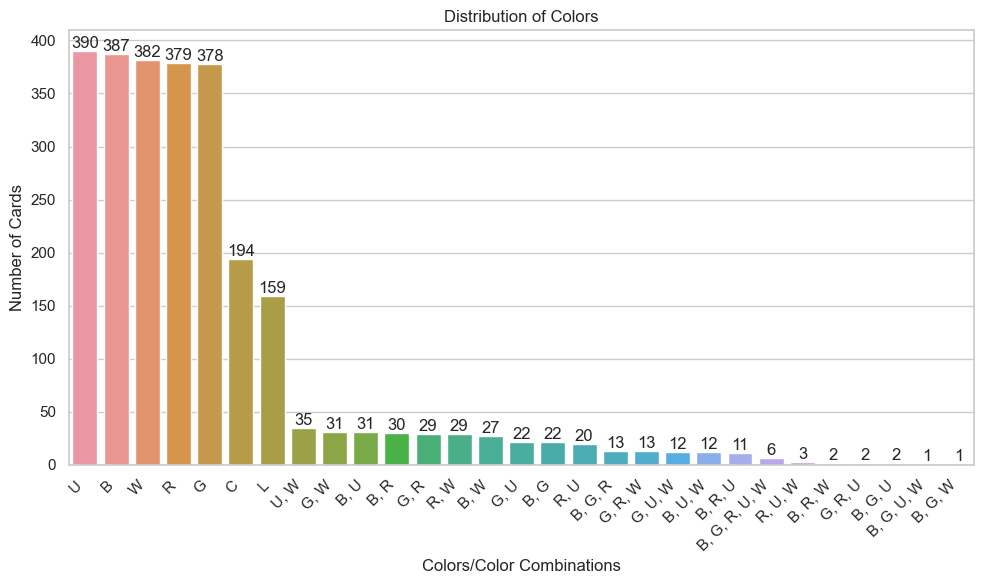

In [840]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x=standard_legal_df['colors'], order=standard_legal_df['colors'].value_counts().index)
ax.bar_label(ax.containers[0])

plt.xticks(rotation=45, ha='right')
plt.xlabel('Colors/Color Combinations')
plt.ylabel('Number of Cards')
plt.title('Distribution of Colors')

plt.tight_layout()
plt.show()


## Clean the Price df

In [841]:
# prices for adeline and confirming that I can merge with other dfs based on uuid
price_df[price_df['uuid'] == 'ac11ebbb-d5c6-5214-8a17-e2924415430a']


,cardFinish,currency,date,gameAvailability,price,priceProvider,providerListing,uuid
406664,normal,USD,2023-10-22,mtgo,0.14,cardhoarder,retail,ac11ebbb-d5c6-5214-8a17-e2924415430a
406665,normal,USD,2023-10-22,paper,0.14,tcgplayer,buylist,ac11ebbb-d5c6-5214-8a17-e2924415430a
406666,foil,USD,2023-10-22,paper,0.26,tcgplayer,buylist,ac11ebbb-d5c6-5214-8a17-e2924415430a
406667,normal,USD,2023-10-22,paper,0.68,tcgplayer,retail,ac11ebbb-d5c6-5214-8a17-e2924415430a
406668,foil,USD,2023-10-22,paper,0.80,tcgplayer,retail,ac11ebbb-d5c6-5214-8a17-e2924415430a
406669,normal,EUR,2023-10-22,paper,0.50,cardmarket,retail,ac11ebbb-d5c6-5214-8a17-e2924415430a
406670,foil,EUR,2023-10-22,paper,0.60,cardmarket,retail,ac11ebbb-d5c6-5214-8a17-e2924415430a
406671,normal,USD,2023-10-22,paper,0.10,cardkingdom,buylist,ac11ebbb-d5c6-5214-8a17-e2924415430a
406672,foil,USD,2023-10-22,paper,0.38,cardkingdom,buylist,ac11ebbb-d5c6-5214-8a17-e2924415430a
406673,normal,USD,2023-10-22,paper,0.99,cardkingdom,retail,ac11ebbb-d5c6-5214-8a17-e2924415430a


In [842]:
# Check kinds of currency in the data frame
price_df.currency.unique()


array(['USD', 'EUR'], dtype=object)

In [843]:
# Euro price percnetage
len(price_df[price_df['currency']=='EUR'])/len(price_df['price'])


0.18032090681656732

In [844]:
conversion_rates = {
    'EUR': 1.18
}
price_df['price_usd'] = price_df.apply(lambda row: row['price'] * conversion_rates[row['currency']]
                                       if row['currency'] == 'EUR' else row['price'], axis=1)


In [845]:
# Price df where all prices are USD
price_df.drop(columns=['currency', 'price'])


,cardFinish,date,gameAvailability,priceProvider,providerListing,uuid,price_usd
0,normal,2023-10-22,mtgo,cardhoarder,retail,f182e364-0439-5594-a6e6-75f7889ccf45,0.07
1,normal,2023-10-22,mtgo,cardhoarder,retail,330deaa3-dd7a-52a8-bfbc-b323cd16a409,0.23
2,normal,2023-10-22,mtgo,cardhoarder,retail,79e36956-b91f-580f-8309-7d9585a67560,0.02
3,normal,2023-10-22,mtgo,cardhoarder,retail,6afb2b4c-530a-57d5-8e7f-871239f6fa05,0.15
4,normal,2023-10-22,mtgo,cardhoarder,retail,b1fc2762-92aa-5a14-8509-a59cb611e376,0.02
...,...,...,...,...,...,...,...
647535,normal,2023-10-22,paper,cardsphere,retail,172a10dc-1b3d-5d24-b312-89fe2387a81e,650.07
647536,normal,2023-10-22,paper,cardsphere,retail,c04b97ec-5f88-5709-992b-486303835d3d,33.99
647537,normal,2023-10-22,paper,cardsphere,retail,a0400e83-f5b3-5353-ba4b-23faad67e4db,5.56
647538,normal,2023-10-22,paper,cardsphere,retail,5726ee7a-7b47-5735-8c75-7a5d4d68df1d,9.78


In [846]:
# Find out all forms of availability
price_df['gameAvailability'].value_counts()


paper    582564
mtgo      64976
Name: gameAvailability, dtype: int64

In [847]:
# All I want are paper forms, remove all mtgo prices
price_df = price_df[price_df['gameAvailability'] != 'mtgo']
price_df['gameAvailability'].value_counts()


paper    582564
Name: gameAvailability, dtype: int64

In [848]:
# Query for all forms of listings
price_df['providerListing'].value_counts()


retail     402907
buylist    179657
Name: providerListing, dtype: int64

In [849]:
# Remove buylists as it may not be very helpful to base my predictions on predictions
price_df = price_df[price_df['providerListing'] != 'buylist']
price_df['providerListing'].value_counts()


retail    402907
Name: providerListing, dtype: int64

In [850]:
# drop all the columns as I intend to use the mean prices for each id
price_df = price_df.drop(columns=['priceProvider', 'providerListing', 'gameAvailability', 'currency', 'price']).copy()
price_df


,cardFinish,date,uuid,price_usd
74,normal,2023-10-22,afc52162-e37d-5645-ac1b-06b814d61c48,6.6700
75,foil,2023-10-22,afc52162-e37d-5645-ac1b-06b814d61c48,30.1800
76,normal,2023-10-22,afc52162-e37d-5645-ac1b-06b814d61c48,3.1978
77,foil,2023-10-22,afc52162-e37d-5645-ac1b-06b814d61c48,15.1630
80,normal,2023-10-22,afc52162-e37d-5645-ac1b-06b814d61c48,4.9900
...,...,...,...,...
647535,normal,2023-10-22,172a10dc-1b3d-5d24-b312-89fe2387a81e,650.0700
647536,normal,2023-10-22,c04b97ec-5f88-5709-992b-486303835d3d,33.9900
647537,normal,2023-10-22,a0400e83-f5b3-5353-ba4b-23faad67e4db,5.5600
647538,normal,2023-10-22,5726ee7a-7b47-5735-8c75-7a5d4d68df1d,9.7800


In [851]:
# Get all card ids for the standard legal cards
legal_ids = standard_legal_df['uuid'].values


In [852]:
# Price df for legal cards
legal_price_df = price_df[price_df['uuid'].isin(legal_ids)]
legal_price_df


,cardFinish,date,uuid,price_usd
326102,normal,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,8.7800
326103,foil,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,11.1200
326104,normal,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,12.4962
326105,foil,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,16.4610
326108,normal,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,11.9900
...,...,...,...,...
647237,foil,2023-10-22,286fd366-82c8-5948-8101-d10bcf67fbf1,3.8350
647238,normal,2023-10-22,a36682d1-8f05-5039-a892-9ce0072591cf,5.8410
647239,foil,2023-10-22,a36682d1-8f05-5039-a892-9ce0072591cf,5.9000
647240,normal,2023-10-22,8736023c-a553-572a-a00c-07fca44030a8,2.0532


In [853]:
print(f"number of unique ids in the new priced_df: {legal_price_df['uuid'].nunique()}")
print(f"number of unique ids in the legal set: {standard_legal_df['uuid'].nunique()}")


number of unique ids in the new priced_df: 2542
number of unique ids in the legal set: 2623


#### This means I have lost a few cards in the process, so I took a different approach.

In [854]:
# Create a legal id data frame to be merged to the price df
legal_id_df = pd.DataFrame({'uuid': legal_ids})
legal_id_df


,uuid
0,f10c65cc-1a64-552e-b53c-f825ca89d5eb
1,cf968d16-027f-5970-a3a3-cb2f49e8dca0
2,13d054c7-4c25-5425-8b39-01fed17ebca1
3,295b974a-b0ee-59f3-829e-6f9912c9c9b7
4,87f85d5d-834c-589d-9738-1983bba0ded8
...,...
2618,2d2dc7fe-461a-5624-905b-216b43f63644
2619,e1a431ee-d95b-521b-9429-63885fab45a1
2620,6141fd5d-4051-530e-850c-e35a82c990a1
2621,f5c9b1a7-3c21-51e5-a15b-0278d9f748e5


In [855]:
# I do not have prices for all stnadard cards again
Legal_price_df = pd.merge(legal_id_df, price_df, on='uuid', how='inner')
Legal_price_df['uuid'].nunique()


2542

In [856]:
# Check if any of the legal ids are duplicated
standard_legal_df['uuid'].duplicated().value_counts()


False    2623
Name: uuid, dtype: int64

In [857]:
# Get the ids for all missing cards
missing_ids = set(standard_legal_df['uuid']).difference(set(Legal_price_df['uuid']))
missing_ids_list = list(missing_ids)
missing_ids_list


['617d7fa1-9c6a-5c12-89af-edb9c024a3ac',
 'ecd7d5d4-dbbe-5459-a59a-2cb35b622468',
 '898b8fee-6b72-5d54-a6aa-4620966b8559',
 'f33b68df-48d6-52e6-b5b2-c1f04e703097',
 '380c6ba9-9af3-50be-a0b4-fadf855a6eac',
 '1e12a7c6-8515-58d9-9537-02d4f90822e6',
 '7ee44182-c569-5d27-a7fa-2eda9dc4aaa3',
 'ea57a618-f931-5d14-83a7-c77a6ae9a153',
 '2f2c79aa-6787-5a10-9678-48adf998db6a',
 '0ccafea2-47bd-5dae-a70d-5bdc7f38585b',
 '45d498bd-510b-5e6d-a984-0693af708f26',
 'e4856bec-930c-5543-831a-461702793087',
 '3e1a7583-f759-520c-ac76-2fa17c7c4537',
 '3b38f0c9-62bc-5c31-836d-acec4c35a148',
 'c2acdf80-6adb-5bf3-a9b6-a96f93d8a695',
 '1bdb024a-04db-5b79-9152-9b6650e5dbde',
 'dc0faba5-ac21-5610-b725-1ca2e9f25476',
 '1d620f05-bddf-5c47-9424-f4d0f4cc6ea5',
 '10af31ad-b026-510a-b542-11165159621d',
 '3f67a4be-9995-56e1-8c4f-57f5e255062d',
 '75199996-b353-556a-9aaa-d5a46c301d85',
 '43d65e42-97f3-5961-ac82-8afe1492f725',
 '1508473b-5b9d-50be-a1dd-a2843c8473ef',
 'cbb79b64-9b16-52bf-bf1d-e518166558cb',
 '87a1f65e-856b-

In [858]:
# Checking if any of the ids are in the price data frame
missing_data_frame = [price_df[price_df['uuid']== id] for id in missing_ids_list]
missing_df = pd.concat(missing_data_frame)
missing_df


,cardFinish,date,uuid,price_usd


In [859]:
missing_cards = [standard_legal_df[standard_legal_df['uuid']==id] for id in missing_ids_list]
missing_cards_df = pd.concat(missing_cards)
missing_cards_df


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
1067,A-Cabaretti Charm,Instant,"G, R, W",NaN,NaN,{R}{G}{W},3.0,uncommon,SNC,617d7fa1-9c6a-5c12-89af-edb9c024a3ac
1057,A-Warm Welcome,Sorcery,G,NaN,NaN,{3}{G},4.0,common,SNC,ecd7d5d4-dbbe-5459-a59a-2cb35b622468
584,A-Imperial Subduer,Creature,W,3,1,{1}{W},2.0,common,NEO,898b8fee-6b72-5d54-a6aa-4620966b8559
1126,A-Shattered Seraph,Creature,"B, U, W",4,5,{4}{W}{U}{B},7.0,common,SNC,f33b68df-48d6-52e6-b5b2-c1f04e703097
78,A-Shipwreck Sifters,Creature,U,1,2,{1}{U},2.0,common,MID,380c6ba9-9af3-50be-a0b4-fadf855a6eac
...,...,...,...,...,...,...,...,...,...,...
949,A-Deal Gone Bad,Instant,B,NaN,NaN,{3}{B},4.0,common,SNC,21e385d3-b4fa-5cdd-bffa-8f34c3d20cb1
655,A-Thousand-Faced Shadow,Creature,U,1,1,{U},1.0,rare,NEO,20b46b20-1dff-5333-a42e-23db2674bb6f
1002,A-Pyre-Sledge Arsonist,Creature,R,2,3,{2}{R},3.0,uncommon,SNC,a2365a98-cc17-51f8-aa18-592ce10c0348
367,A-Stitched Assistant,Creature,U,2,1,{1}{U},2.0,common,VOW,0b275505-8ac9-556d-a667-2f73adb8e1ab


#### The A- indicated that these are alchemy cards which are only avialable in MTGA(digital-format) and are legal in the digital standard but would not have prices in the paper format

In [860]:
# remove all alchemy cards data set
standard_legal_df = standard_legal_df[~standard_legal_df['uuid'].isin(missing_ids_list)]
standard_legal_df


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
0,"Adeline, Resplendent Cathar",Creature,W,*,4,{1}{W}{W},3.0,rare,MID,f10c65cc-1a64-552e-b53c-f825ca89d5eb
1,Ambitious Farmhand // Seasoned Cathar,Creature,W,1,1,{1}{W},2.0,uncommon,MID,cf968d16-027f-5970-a3a3-cb2f49e8dca0
2,Beloved Beggar // Generous Soul,Creature,W,0,4,{1}{W},2.0,uncommon,MID,13d054c7-4c25-5425-8b39-01fed17ebca1
3,Bereaved Survivor // Dauntless Avenger,Creature,W,2,1,{2}{W},3.0,uncommon,MID,295b974a-b0ee-59f3-829e-6f9912c9c9b7
4,Blessed Defiance,Instant,W,NaN,NaN,{W},1.0,common,MID,87f85d5d-834c-589d-9738-1983bba0ded8
...,...,...,...,...,...,...,...,...,...,...
2622,Charging Hooligan,Creature,R,3,3,{3}{R},4.0,uncommon,WOE,2d2dc7fe-461a-5624-905b-216b43f63644
2623,Ogre Chitterlord,Creature,R,6,5,{4}{R}{R},6.0,rare,WOE,e1a431ee-d95b-521b-9429-63885fab45a1
2624,Intrepid Trufflesnout // Go Hog Wild,Creature,G,3,1,{1}{G},2.0,uncommon,WOE,6141fd5d-4051-530e-850c-e35a82c990a1
2625,Provisions Merchant,Creature,G,3,3,{2}{G}{G},4.0,uncommon,WOE,f5c9b1a7-3c21-51e5-a15b-0278d9f748e5


#### This missmatch prompted me to look at the cards df again to check for any other data that might be causing some problems

In [952]:
# all the lands in the data that are duplicated
basic_lands = ['Plains',
'Island',
'Swamp',
'Mountain',
'Forest']
basic_lands = standard_legal_df[standard_legal_df['name'].isin(basic_lands)]
basic_lands


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
275,Plains,Land,NaN,NaN,NaN,NaN,0.0,common,MID,e409e1f5-59bd-51f0-be9c-4152342944c1
276,Island,Land,NaN,NaN,NaN,NaN,0.0,common,MID,53feba3f-3821-50eb-878f-d8a6f91ee1ff
277,Swamp,Land,NaN,NaN,NaN,NaN,0.0,common,MID,fd072f4b-fa3d-55fd-8fce-9f4030d811ed
278,Mountain,Land,NaN,NaN,NaN,NaN,0.0,common,MID,44970d1e-88c1-565c-bf1b-abc6af8b365e
279,Forest,Land,NaN,NaN,NaN,NaN,0.0,common,MID,ea2a2ba8-dec2-55c7-af4a-2de52d404cc0
558,Plains,Land,NaN,NaN,NaN,NaN,0.0,common,VOW,e16e3fb9-90d1-5c27-928d-86327b9ade5b
559,Island,Land,NaN,NaN,NaN,NaN,0.0,common,VOW,2c5b1ab7-eed5-5d00-86ae-6d337c8cf1e7
560,Swamp,Land,NaN,NaN,NaN,NaN,0.0,common,VOW,f8b44690-c734-50e6-913e-70f259c1692f
561,Mountain,Land,NaN,NaN,NaN,NaN,0.0,common,VOW,c689a37a-09b2-51dd-9e83-0753057a85e6
562,Forest,Land,NaN,NaN,NaN,NaN,0.0,common,VOW,b60bb2b8-c393-5ef7-be3b-bd9b671fdaa3


In [951]:
# non-land duplicates
duplicates_df = standard_legal_df[standard_legal_df['name'].duplicated(keep=False)
                                 & (standard_legal_df['types'] != 'Land')]
duplicates_df


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
102,Duress,Sorcery,B,NaN,NaN,{B},1.0,common,MID,42f83d7a-2fa1-5e90-99f3-0f650b6e36e5
177,Bramble Armor,Artifact,G,NaN,NaN,{1}{G},2.0,common,MID,222d00de-a710-52cb-b85a-0b6b30daae71
205,Snarling Wolf,Creature,G,1,1,{G},1.0,common,MID,65a6a7db-d3ec-5f2f-b361-8e80aa0336e7
474,Bramble Armor,Artifact,G,NaN,NaN,{1}{G},2.0,common,VOW,650a0d57-8cdb-5361-b0b0-607ed2e454ac
505,Snarling Wolf,Creature,G,1,1,{G},1.0,common,VOW,c5b38839-3c61-5c8f-874d-55c809b090be
910,Disdainful Stroke,Instant,U,NaN,NaN,{1}{U},2.0,common,SNC,180a3f6e-7a22-5e86-8ed0-dcd778ab8100
1023,Broken Wings,Instant,G,NaN,NaN,{2}{G},3.0,common,SNC,c16da7d7-bd82-5226-9c2f-dfb050b0b907
1234,Negate,Instant,U,NaN,NaN,{1}{U},2.0,common,DMU,66766b66-2524-51ae-b397-91ed7c2b4a5d
1324,Thrill of Possibility,Instant,R,NaN,NaN,{1}{R},2.0,common,DMU,b03f4111-007b-5c13-af38-05feef7d0289
1333,Broken Wings,Instant,G,NaN,NaN,{2}{G},3.0,common,DMU,4d1f2203-341d-50ec-b03f-ce512af86f7f


#### This means that we have to eliminate the duplicates from both the price and cards data frames. For the price data frame I decided to take the mean prices of all the duplicates

In [953]:
# Starting with the cards df, I will keep the first lands from the MID set
duplicated_lands_mask = standard_legal_df.duplicated(subset='name') & (standard_legal_df['types'] == 'Land')
first_lands_mask = ~duplicated_lands_mask | (standard_legal_df['types'] != 'Land')
standard_legal_df = standard_legal_df[first_lands_mask]

standard_legal_df[standard_legal_df['name'] == ]


ValueError: Can only compare identically-labeled Series objects

#### Back to cleaning prices

In [864]:
legal_price_df


,cardFinish,date,uuid,price_usd
326102,normal,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,8.7800
326103,foil,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,11.1200
326104,normal,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,12.4962
326105,foil,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,16.4610
326108,normal,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,11.9900
...,...,...,...,...
647237,foil,2023-10-22,286fd366-82c8-5948-8101-d10bcf67fbf1,3.8350
647238,normal,2023-10-22,a36682d1-8f05-5039-a892-9ce0072591cf,5.8410
647239,foil,2023-10-22,a36682d1-8f05-5039-a892-9ce0072591cf,5.9000
647240,normal,2023-10-22,8736023c-a553-572a-a00c-07fca44030a8,2.0532


In [879]:
legal_price_df.price_usd = round(legal_price_df.price_usd, 2)
legal_price_df


/var/folders/tm/jmhp8xvj4_d4hh_01cf1jt_r0000gn/T/ipykernel_97025/1397449851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  legal_price_df.price_usd = round(legal_price_df.price_usd, 2)


,cardFinish,date,uuid,price_usd
326102,normal,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,8.78
326103,foil,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,11.12
326104,normal,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,12.50
326105,foil,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,16.46
326108,normal,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,11.99
...,...,...,...,...
647237,foil,2023-10-22,286fd366-82c8-5948-8101-d10bcf67fbf1,3.84
647238,normal,2023-10-22,a36682d1-8f05-5039-a892-9ce0072591cf,5.84
647239,foil,2023-10-22,a36682d1-8f05-5039-a892-9ce0072591cf,5.90
647240,normal,2023-10-22,8736023c-a553-572a-a00c-07fca44030a8,2.05


In [880]:
# The price of the most expensive card in standard
most_expensive_price = legal_price_df[legal_price_df.price_usd == legal_price_df.price_usd.max()]
most_expensive_price


,cardFinish,date,uuid,price_usd
354760,foil,2023-10-22,9408edd9-f629-5231-b827-1ea1211d1d90,111.92


In [881]:
# The name of the most expensive card
most_expensive_card = standard_legal_df[standard_legal_df.uuid.isin(most_expensive_price.uuid)]
most_expensive_card


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
1283,"Sheoldred, the Apocalypse",Creature,B,4,5,{2}{B}{B},4.0,mythic,DMU,9408edd9-f629-5231-b827-1ea1211d1d90


In [882]:
# all of the foil prices
foil_df = legal_price_df[legal_price_df.cardFinish == 'foil']
foil_df


,cardFinish,date,uuid,price_usd
326103,foil,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,11.12
326105,foil,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,16.46
326109,foil,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,14.99
326119,foil,2023-10-22,cf968d16-027f-5970-a3a3-cb2f49e8dca0,0.38
326121,foil,2023-10-22,cf968d16-027f-5970-a3a3-cb2f49e8dca0,0.41
...,...,...,...,...
580706,foil,2023-10-22,39396ccd-e82b-59a3-9bdf-764cc8c17f23,1.88
580710,foil,2023-10-22,39396ccd-e82b-59a3-9bdf-764cc8c17f23,2.49
647237,foil,2023-10-22,286fd366-82c8-5948-8101-d10bcf67fbf1,3.84
647239,foil,2023-10-22,a36682d1-8f05-5039-a892-9ce0072591cf,5.90


In [883]:
# Percentage of foil prices
percentage = len(legal_price_df[legal_price_df['cardFinish'] == 'foil'])/len(legal_price_df)
percentage = round(percentage, 5) * 100
f"{percentage}%"


'42.875%'

In [884]:
legal_price_df.groupby(legal_price_df.uuid)
legal_price_df


,cardFinish,date,uuid,price_usd
326102,normal,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,8.78
326103,foil,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,11.12
326104,normal,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,12.50
326105,foil,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,16.46
326108,normal,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,11.99
...,...,...,...,...
647237,foil,2023-10-22,286fd366-82c8-5948-8101-d10bcf67fbf1,3.84
647238,normal,2023-10-22,a36682d1-8f05-5039-a892-9ce0072591cf,5.84
647239,foil,2023-10-22,a36682d1-8f05-5039-a892-9ce0072591cf,5.90
647240,normal,2023-10-22,8736023c-a553-572a-a00c-07fca44030a8,2.05


In [885]:
normal_df = legal_price_df[legal_price_df.cardFinish != 'foil']
normal_df


,cardFinish,date,uuid,price_usd
326102,normal,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,8.78
326104,normal,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,12.50
326108,normal,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,11.99
326110,normal,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,8.37
326118,normal,2023-10-22,cf968d16-027f-5970-a3a3-cb2f49e8dca0,0.22
...,...,...,...,...
580709,normal,2023-10-22,39396ccd-e82b-59a3-9bdf-764cc8c17f23,2.49
580711,normal,2023-10-22,39396ccd-e82b-59a3-9bdf-764cc8c17f23,1.71
647236,normal,2023-10-22,286fd366-82c8-5948-8101-d10bcf67fbf1,2.71
647238,normal,2023-10-22,a36682d1-8f05-5039-a892-9ce0072591cf,5.84


In [911]:
# group prices by uuid and the finish of the cards and calcualte the mean for the price
mean_prices = legal_price_df.groupby(['uuid', 'cardFinish'])['price_usd'].mean().reset_index()

# merge the darta frame to add hte mean to the data frame
result_df = pd.merge(legal_price_df, mean_prices, how='left', on=['uuid', 'cardFinish'], suffixes=('', '_mean'))

# Calculate mean prices separately for 'foil' and 'normal' card finishes grouped by 'uuid'
mean_foil_prices = result_df[result_df['cardFinish'] == 'foil'].groupby('uuid')['price_usd'].mean()
mean_normal_prices = result_df[result_df['cardFinish'] == 'normal'].groupby('uuid')['price_usd'].mean()

# Create new columns for mean prices of 'foil' and 'normal' card finishes grouped by 'uuid'
result_df['mean_price_foil_usd'] = result_df['uuid'].map(mean_foil_prices)
result_df['mean_price_normal_usd'] = result_df['uuid'].map(mean_normal_prices)

# Print the updated DataFrame
clean_price_df = result_df.drop_duplicates(subset='uuid')
clean_price_df.drop(columns=['price_usd', 'price_usd_mean', 'cardFinish'], inplace=True)
columns_to_round = ['mean_price_foil_usd', 'mean_price_normal_usd']
clean_price_df[columns_to_round] = clean_price_df[columns_to_round].round(2)
clean_price_df


/var/folders/tm/jmhp8xvj4_d4hh_01cf1jt_r0000gn/T/ipykernel_97025/516763020.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_price_df.drop(columns=['price_usd', 'price_usd_mean', 'cardFinish'], inplace=True)
/var/folders/tm/jmhp8xvj4_d4hh_01cf1jt_r0000gn/T/ipykernel_97025/516763020.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_price_df[columns_to_round] = clean_price_df[columns_to_round].round(2)


,date,uuid,mean_price_foil_usd,mean_price_normal_usd
0,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,14.19,10.41
7,2023-10-22,cf968d16-027f-5970-a3a3-cb2f49e8dca0,0.43,0.28
14,2023-10-22,13d054c7-4c25-5425-8b39-01fed17ebca1,0.22,0.19
21,2023-10-22,295b974a-b0ee-59f3-829e-6f9912c9c9b7,0.28,0.18
28,2023-10-22,87f85d5d-834c-589d-9738-1983bba0ded8,0.20,0.16
...,...,...,...,...
17671,2023-10-22,1fed551b-5e52-56bb-943d-0d42937e98bb,2.53,1.20
17678,2023-10-22,39396ccd-e82b-59a3-9bdf-764cc8c17f23,2.06,1.85
17685,2023-10-22,286fd366-82c8-5948-8101-d10bcf67fbf1,3.84,2.71
17687,2023-10-22,a36682d1-8f05-5039-a892-9ce0072591cf,5.90,5.84


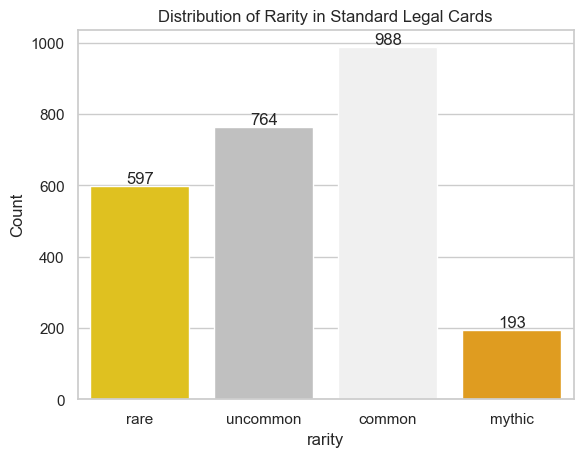

In [ ]:
# Count of each rarity
custom_palette = {
    'common': '#F0F0F0',
    'uncommon': 'silver',
    'mythic': 'orange',
    'rare': 'gold'
}

ax = sns.countplot(x='rarity', palette=custom_palette, data=standard_legal_df)
ax.bar_label(ax.containers[0])
plt.ylabel('Count')
plt.title('Distribution of Rarity in Standard Legal Cards')
plt.show()


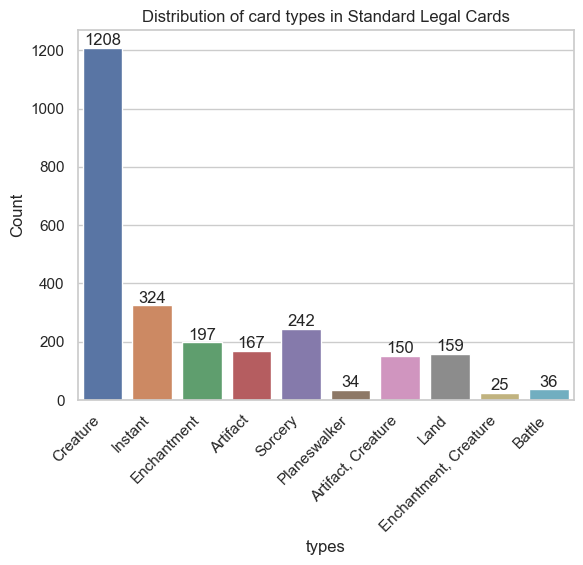

In [ ]:
# Count of card types
ax = sns.countplot(x='types', data=standard_legal_df)
ax.bar_label(ax.containers[0])
plt.ylabel('Count')
plt.title('Distribution of card types in Standard Legal Cards')
plt.xticks(rotation=45, ha='right')
plt.show()


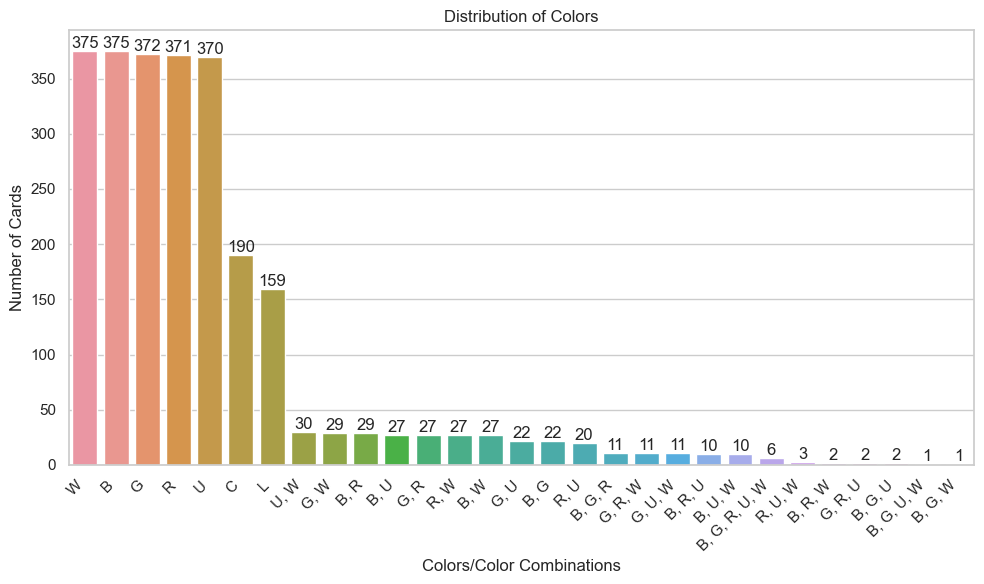

In [ ]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x=standard_legal_df['colors'], order=standard_legal_df['colors'].value_counts().index)
ax.bar_label(ax.containers[0])

plt.xticks(rotation=45, ha='right')
plt.xlabel('Colors/Color Combinations')
plt.ylabel('Number of Cards')
plt.title('Distribution of Colors')

plt.tight_layout()
plt.show()
